In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

In [4]:
df.head()

,A,B,C
2016-07-01 00:00:00,-0.345000,1.586530,0.788122
2016-07-01 00:00:01,-1.363582,0.725064,-2.070249
2016-07-01 00:00:02,1.114124,1.063014,-0.827360
2016-07-01 00:00:03,-0.103579,1.307670,1.250296
2016-07-01 00:00:04,1.611610,0.789219,-0.227240


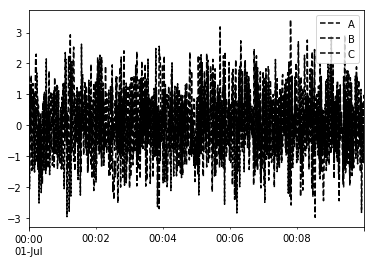

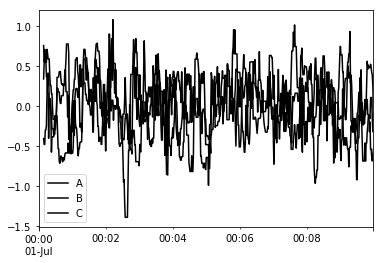

In [5]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.median().plot(style = 'k')

In [6]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,-0.888243,1.127081,-0.736343
2016-07-01 00:00:02,-0.129951,1.102819,-0.770811
2016-07-01 00:00:03,-0.121985,1.164697,-0.160305
2016-07-01 00:00:04,0.322900,1.068340,-0.177483
2016-07-01 00:00:05,0.373000,0.492514,-0.322512
2016-07-01 00:00:06,0.486964,0.471590,-0.376703
2016-07-01 00:00:07,0.499317,0.638928,-0.574844
2016-07-01 00:00:08,0.434077,0.586087,-0.408012
2016-07-01 00:00:09,0.327176,0.353631,-0.153845


In [7]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [8]:
df.head()

,A,B,C,D
2016-06-06,0.574062,0.397883,-0.987965,0.001813
2016-06-07,0.536663,0.421822,0.192915,0.401298
2016-06-08,1.465416,-0.082635,-0.144215,-1.877210
2016-06-09,1.021691,-0.741293,0.005486,1.347445
2016-06-10,1.164918,0.086383,-0.323696,-0.980561


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B76C340B8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000025B76D83198>], dtype=object)

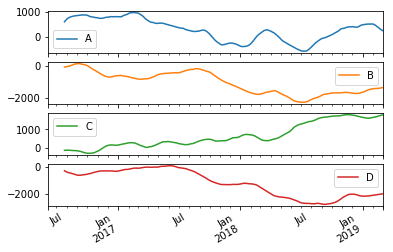

In [9]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [10]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,2.182627,0.376036,0.914555,1.012184


In [11]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.842393,0.608794,-0.891508,0.202462
2016-06-08,1.420309,0.651553,-0.907427,-0.356391
2016-06-09,1.964690,0.487609,-0.914015,-0.298957
2016-06-10,2.524302,0.406519,-0.982707,-0.460609


In [12]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
"more stable, as it uses past data, and isnt overly influenced by one bit or another"

'more stable, as it uses past data, and isnt overly influenced by one bit or another'

In [ ]:
# EWMA
# Why use EWMA?
"if old data is increasingly unpredictive, could weight newer or older data"

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting
"a set of polling data, over a 30 day period, where the rolling window might be too straightforward in its use of past data, and instead an ewma might better represent the strength of recent info"